In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

# 1.  [20 pts] Download the dataset, unzip and explore the file folders. Load the image dataset with training and testing grouped.

In [2]:
%%time
import cv2
import os
IMGSIZE = (128, 128)
X_tr, y_tr, X_ts, y_ts = [], [], [], []
_path = '../input/intel-image-classification'
_labels = ['buildings','forest','glacier','mountain','sea','street']
CNAMES = ['buildings','forest','glacier','mountain','sea','street']

for label in _labels:
    path = _path + '/seg_train/seg_train/' + label
    print(path)
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_tr += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_tr += [CNAMES.index(label)]
    path = _path + '/seg_test/seg_test/' + label
    print(path)
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        X_ts += [cv2.resize(cv2.imread(os.path.join(path,f)), IMGSIZE)]
        y_ts += [CNAMES.index(label)]

../input/intel-image-classification/seg_train/seg_train/buildings
../input/intel-image-classification/seg_test/seg_test/buildings
../input/intel-image-classification/seg_train/seg_train/forest
../input/intel-image-classification/seg_test/seg_test/forest
../input/intel-image-classification/seg_train/seg_train/glacier
../input/intel-image-classification/seg_test/seg_test/glacier
../input/intel-image-classification/seg_train/seg_train/mountain
../input/intel-image-classification/seg_test/seg_test/mountain
../input/intel-image-classification/seg_train/seg_train/sea
../input/intel-image-classification/seg_test/seg_test/sea
../input/intel-image-classification/seg_train/seg_train/street
../input/intel-image-classification/seg_test/seg_test/street
CPU times: user 7.42 s, sys: 323 ms, total: 7.74 s
Wall time: 7.74 s


## Display a few images. How many image channels are there?

In [3]:
X_tr[0].shape


(128, 128, 3)

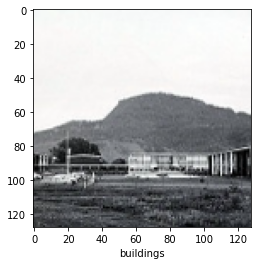

In [4]:
import matplotlib.pyplot as plt
print()
plt.figure()
plt.imshow(X_tr[0])
plt.xlabel(CNAMES[y_tr[0]])
plt.show()


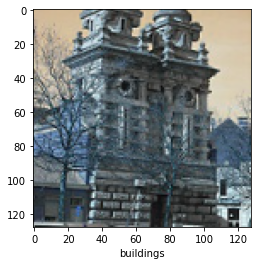

In [5]:
plt.figure()
plt.imshow(X_tr[1000])
plt.xlabel(CNAMES[y_tr[1000]])
plt.show()


## ANSWER: 3 channels

# 2. [20 pts] Convert the imageset to numpy array, such as the array size:

## Conver to numpy

In [6]:
X_tr_np = np.array(X_tr)
X_tr_np.shape

(14034, 128, 128, 3)

In [7]:
X_ts_np = np.array(X_ts)
X_ts_np.shape

(3000, 128, 128, 3)

In [8]:
y_tr_np = np.array(y_tr)
y_tr_np.shape

(14034,)

In [9]:
y_ts_np = np.array(y_ts)
y_ts_np.shape

(3000,)

### scale 0 to 1

In [10]:
X_tr_np = X_tr_np / 255.0
X_ts_np = X_ts_np / 255.0

In [11]:
np.max(X_tr_np)

1.0

# 3. [40 pts] Create a convolutional neural network to train 
and report its performance on the
testing portion of the dataset. 95% reclassification and 75% testing performance should be
easily achievable without any hyperparameter tuning. (Hint: My model, which is similar to
the model in module notebook, took around 10 minutes to train 10 epochs.)

In [12]:
# Clear session
tf.keras.backend.clear_session()

In [13]:
# Our full CNN neural network
cnn1 = tf.keras.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=6, name='fc_2', activation='softmax'))

In [14]:
# Set a seed for repeatibility
tf.random.set_seed(0)

# Build the model
cnn1.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 7

In [15]:
%%time
history = cnn1.fit(X_tr_np, y_tr_np,
        epochs=NUM_EPOCHS,
        shuffle=True)

Epoch 1/7
439/439 [==============================] - 89s 201ms/step - loss: 1.4625 - accuracy: 0.4929
Epoch 2/7
439/439 [==============================] - 86s 195ms/step - loss: 0.7533 - accuracy: 0.7263
Epoch 3/7
439/439 [==============================] - 81s 184ms/step - loss: 0.5003 - accuracy: 0.8153
Epoch 4/7
439/439 [==============================] - 82s 187ms/step - loss: 0.2735 - accuracy: 0.9057
Epoch 5/7
439/439 [==============================] - 82s 186ms/step - loss: 0.1534 - accuracy: 0.9533
Epoch 6/7
439/439 [==============================] - 83s 188ms/step - loss: 0.0821 - accuracy: 0.9735
Epoch 7/7
439/439 [==============================] - 81s 186ms/step - loss: 0.0530 - accuracy: 0.9870
CPU times: user 42min 33s, sys: 34min 3s, total: 1h 16min 36s
Wall time: 9min 44s


## Test

In [16]:
loss, acc = cnn1.evaluate(X_ts_np, y_ts_np, verbose=0)

# Print the loss and accuracy
print(f'Loss= {loss:.3f}, Testing accuracy= {acc:.3f}')

Loss= 1.366, Testing accuracy= 0.745


## Discussion
* Train Accuracy: 0.9870
* Test Accuracy: 0.745

# 4. [20 pts] Add regularization and/or drop-out features to your CNN. Report your model's best performance.

In [17]:
# Clear session
tf.keras.backend.clear_session()

# Our full CNN neural network
cnn2 = tf.keras.Sequential()

cnn2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))

cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.005)))

cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

cnn2.add(tf.keras.layers.Dropout(0.6))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=1024, name='fc_1', activation='relu'))

cnn2.add(tf.keras.layers.Dense(units=6, name='fc_2', activation='softmax'))

In [18]:
# Set a seed for repeatibility
tf.random.set_seed(0)

# Build the model
cnn2.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 7

## Train

In [19]:
%%time
history = cnn2.fit(X_tr_np, y_tr_np,
        epochs=NUM_EPOCHS,
        shuffle=True)

Epoch 1/7
439/439 [==============================] - 95s 216ms/step - loss: 2.4799 - accuracy: 0.4822
Epoch 2/7
439/439 [==============================] - 96s 219ms/step - loss: 0.7873 - accuracy: 0.7194
Epoch 3/7
439/439 [==============================] - 95s 217ms/step - loss: 0.6486 - accuracy: 0.7764
Epoch 4/7
439/439 [==============================] - 96s 219ms/step - loss: 0.5131 - accuracy: 0.8277
Epoch 5/7
439/439 [==============================] - 96s 218ms/step - loss: 0.4190 - accuracy: 0.8673
Epoch 6/7
439/439 [==============================] - 96s 218ms/step - loss: 0.3301 - accuracy: 0.8994
Epoch 7/7
439/439 [==============================] - 94s 215ms/step - loss: 0.3109 - accuracy: 0.9041
CPU times: user 51min 14s, sys: 37min 8s, total: 1h 28min 23s
Wall time: 11min 9s


## Test

In [20]:
loss, acc = cnn2.evaluate(X_ts_np, y_ts_np, verbose=0)

# Print the loss and accuracy
print(f'Loss= {loss:.3f}, Testing accuracy= {acc:.3f}')

Loss= 0.838, Testing accuracy= 0.753


## Discussion:

* Train Accuracy: 0.9727
* Test Accuracy: 0.753
* Used dropout and activity L2 regularizers